In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [3]:
# User-define Variables and Setup
# https://scikit-learn.org/stable/modules/outlier_detection.html
# https://www.kaggle.com/c/customer-churn-prediction-2020/code
import warnings
warnings.filterwarnings("ignore")

WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Lesson 05"

os.chdir(WorkingDir)
checkPath = %pwd
print(checkPath)

D:\TUANTA\VTC Academiy\AI VTCA Teaching Materials\Short-Course AI\4. AI Specialist(AI Engineer)\2. Labs\AI Specialist Lesson 05


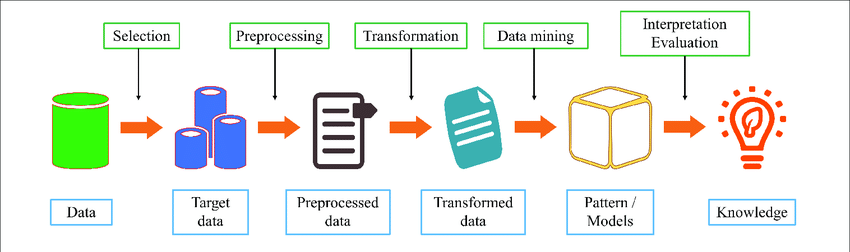

In [4]:
display(Image(filename='Data Mining Process 01.png'))

In [6]:
!pip install category-encoders

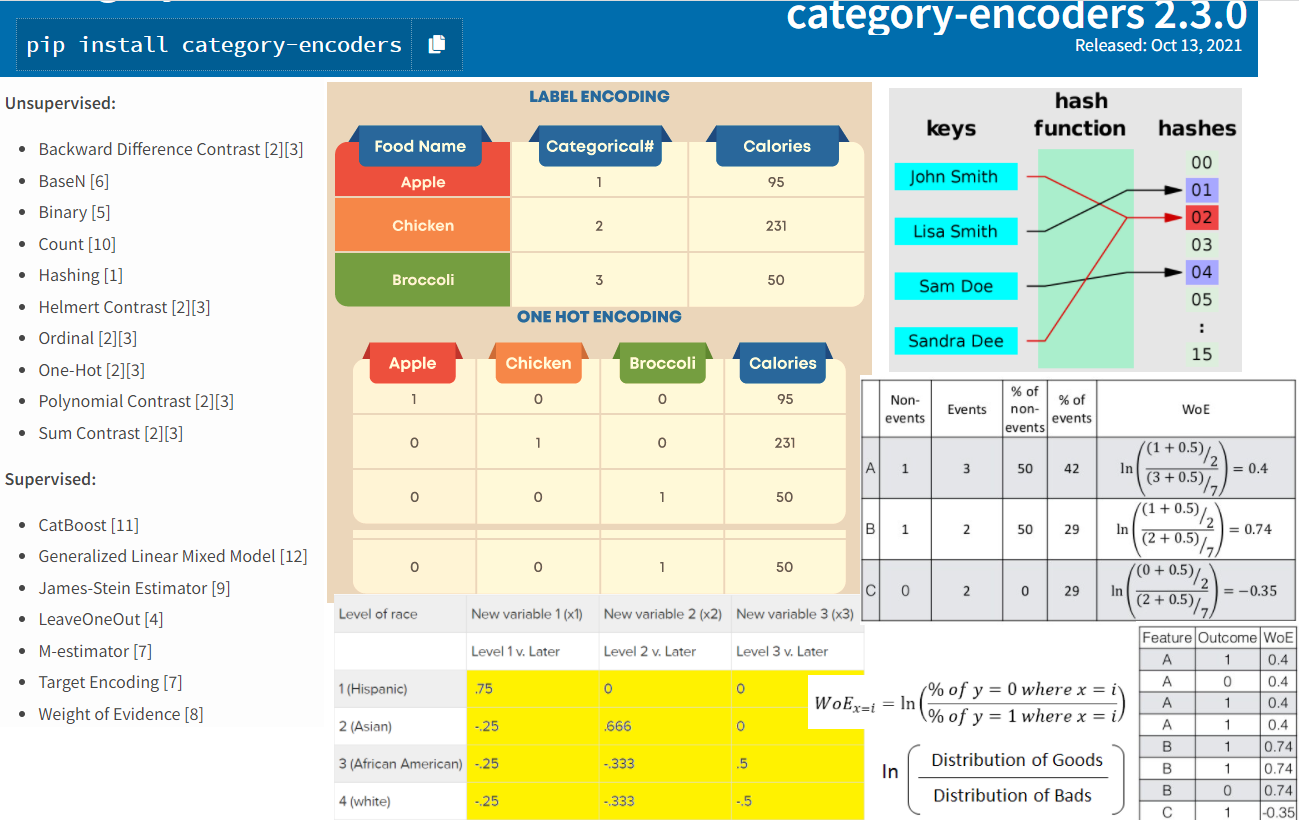

In [7]:
display(Image(filename='Feature Encoding.png'))

In [8]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [10]:
# display the all columns 
pd.set_option('display.max_columns',None)

In [11]:
data = pd.read_csv('TelecomCustomerChurn.csv')

display(data.head())
print(data.shape)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


(4250, 20)


In [13]:
# Checking the missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [14]:
# describe the five points of statistics of numericals data
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
# Describe the string data
data.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [16]:
# Univariate Analysis
# 1. Categorical Variables
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [19]:
# extract the categorical variables
cat_var = [ feature for feature in data.columns if data[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


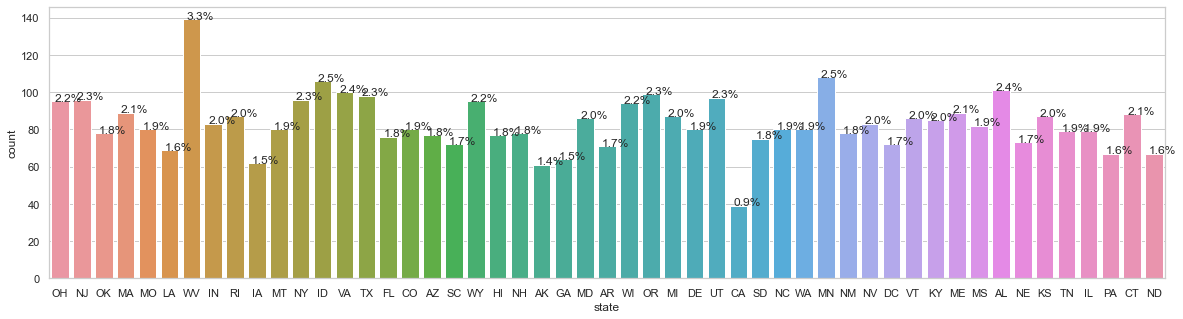

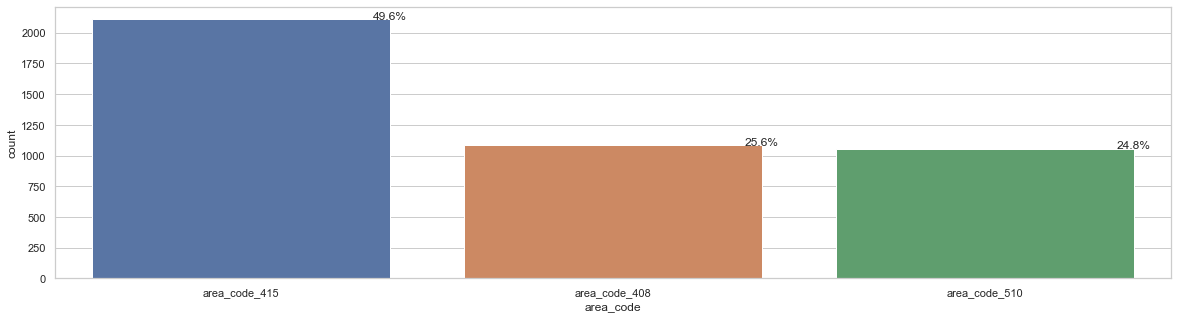

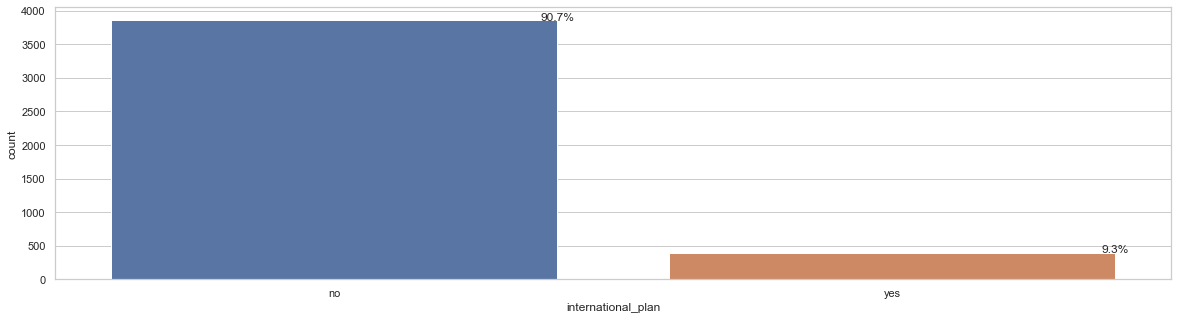

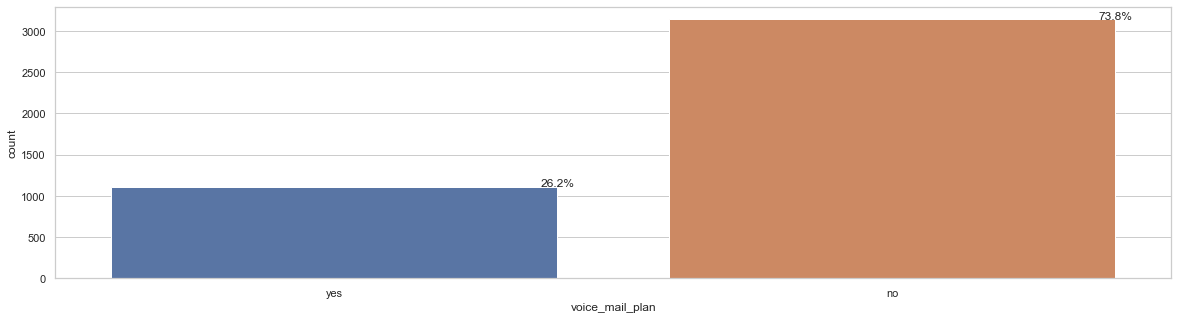

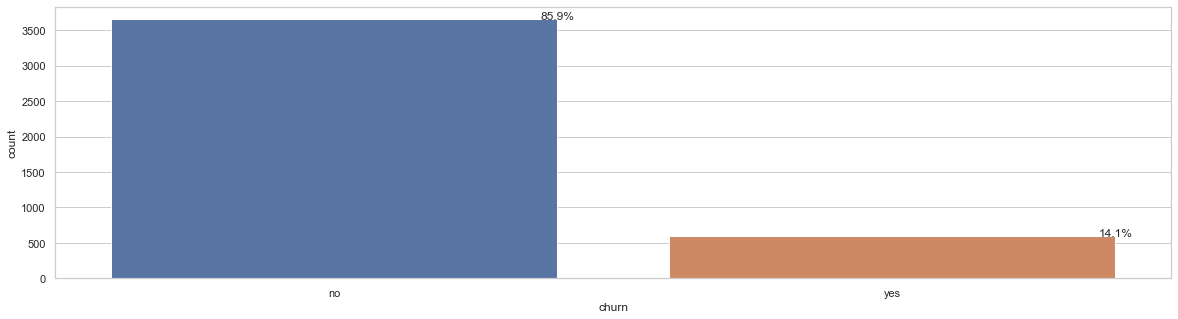

In [20]:
#display the all the categorical variable 
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(data)
    ax = sns.countplot(x = data[feature], data = data)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

In [ ]:
# See the above plot
# 90.7% customers didn't have international plan
# 73.8% customers didn't have voice mail plan
# 49.6% customers are living in the area code area_code_415.
# only 14.1% customers are churn

In [22]:
# 2. Numerical Variables
#Extract the numerical features from the dataset
num_var = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


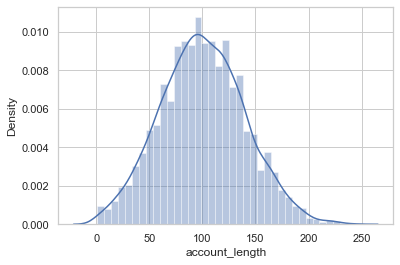

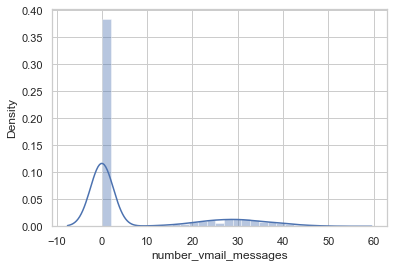

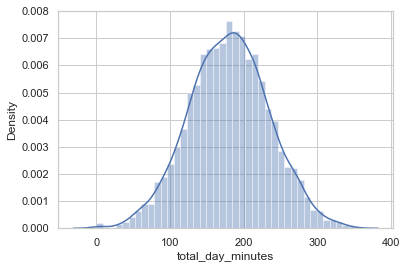

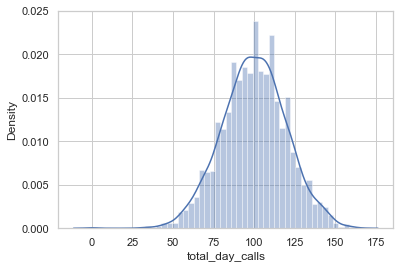

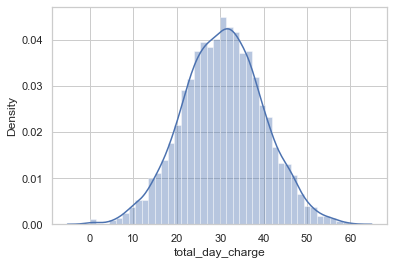

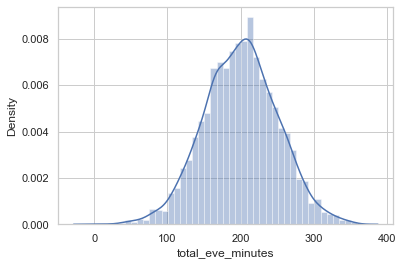

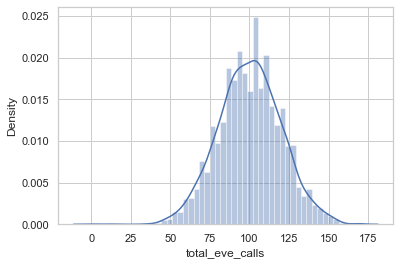

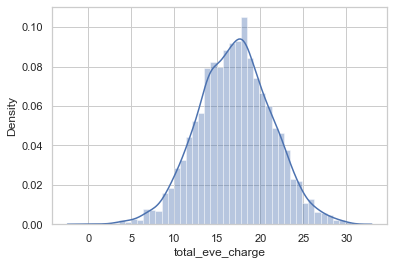

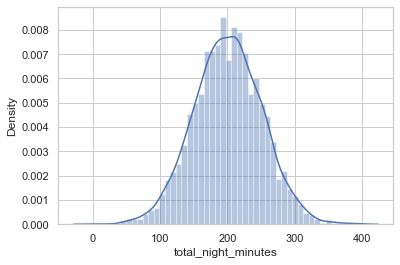

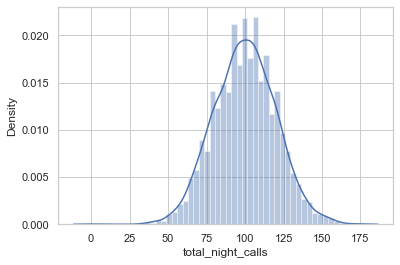

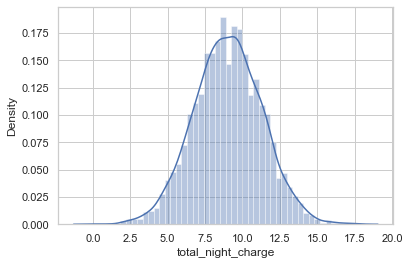

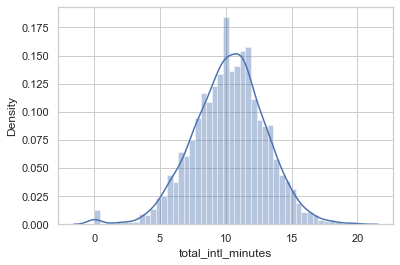

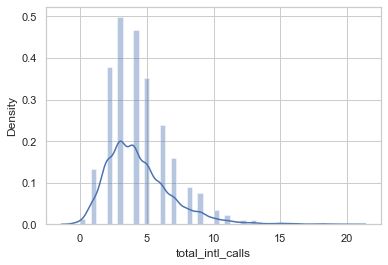

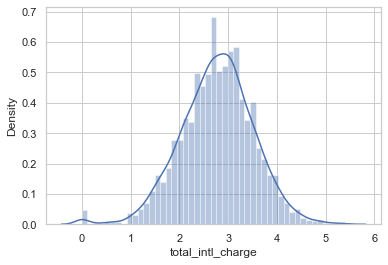

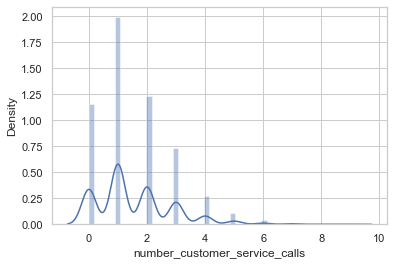

In [23]:
# Density plot of all the numerical features
for feature in num_var:
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

- Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribuation so we can covert into normal distribution in featuer engineering step.
- Other than the obove features all look like a normal distribuation.

Text(0.5, 1.0, 'Churn rate VS account_length')

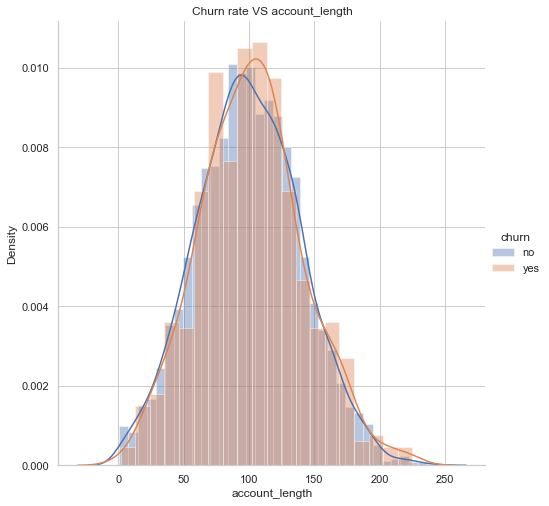

In [25]:
# BiVariate Analysis
# 1. Countinous Features
# customers account length between 60 to 120 has more churn rate
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'account_length').add_legend()
plt.title('Churn rate VS account_length')

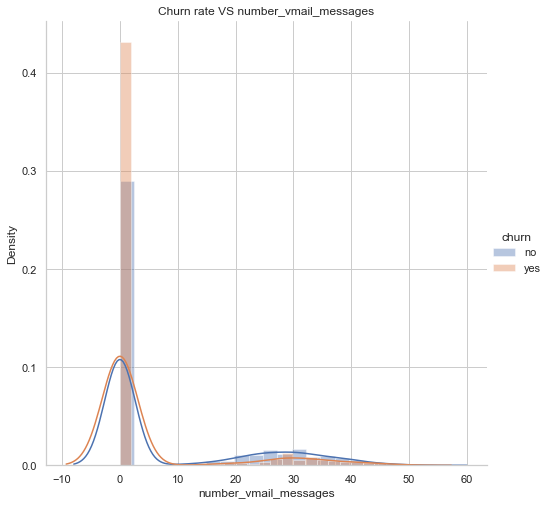

In [26]:
# More churn rate when the number_vamil_messages is 0
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'number_vmail_messages').add_legend()
plt.title('Churn rate VS number_vmail_messages')
plt.show()

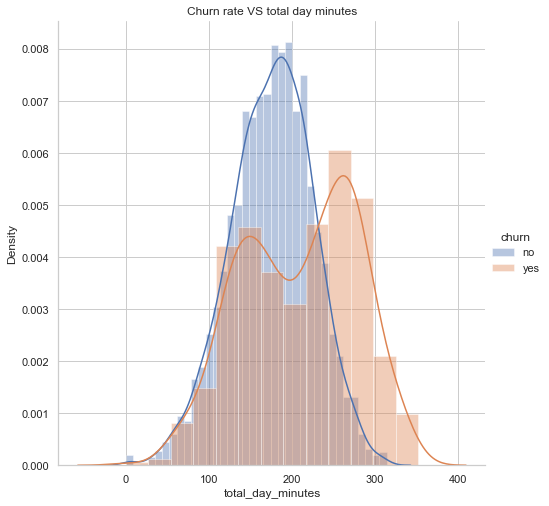

In [27]:
# Churn rate is high when the total_day_minutes is lies between 210 min to 300 min.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_day_minutes').add_legend()
plt.title('Churn rate VS total day minutes')
plt.show()

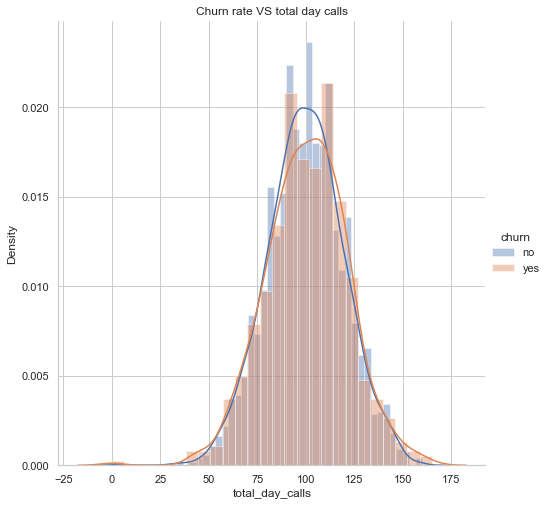

In [29]:
# churn rate is high lies between 85 to 115.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_day_calls').add_legend()
plt.title('Churn rate VS total day calls')
plt.show()

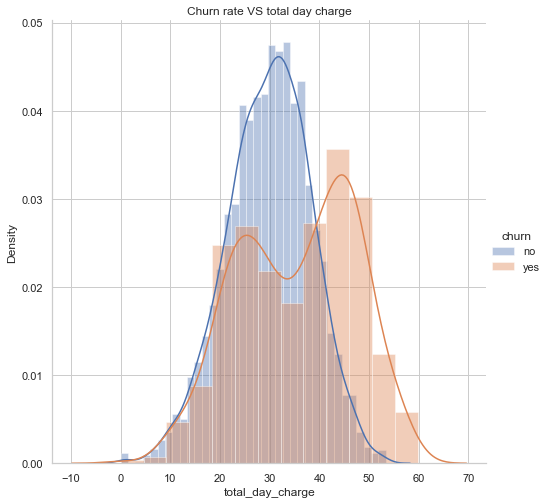

In [30]:
# churn rate is high when total day charge is lies between 40 to 50.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_day_charge').add_legend()
plt.title('Churn rate VS total day charge')
plt.show()

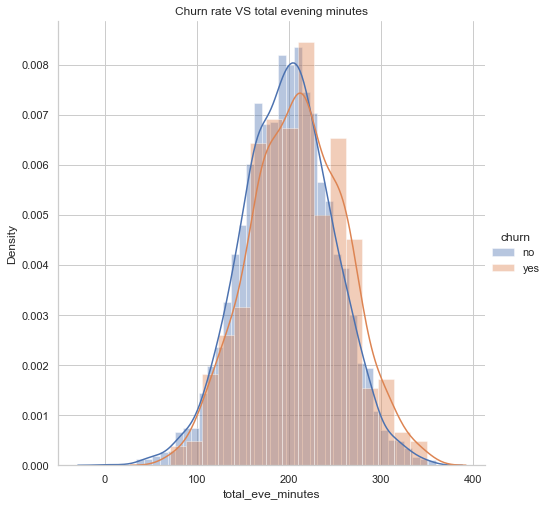

In [31]:
# churn rate is high when the total evening minutes is lies between 180 min to 220 min
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_eve_minutes').add_legend()
plt.title('Churn rate VS total evening minutes')
plt.show()

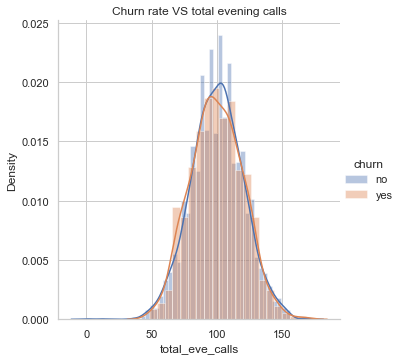

In [32]:
# churn rate is high when total evening calls lies between 90 to 115.
sns.FacetGrid(data, hue='churn',size=5).map(sns.distplot, 'total_eve_calls').add_legend()
plt.title('Churn rate VS total evening calls')
plt.show()

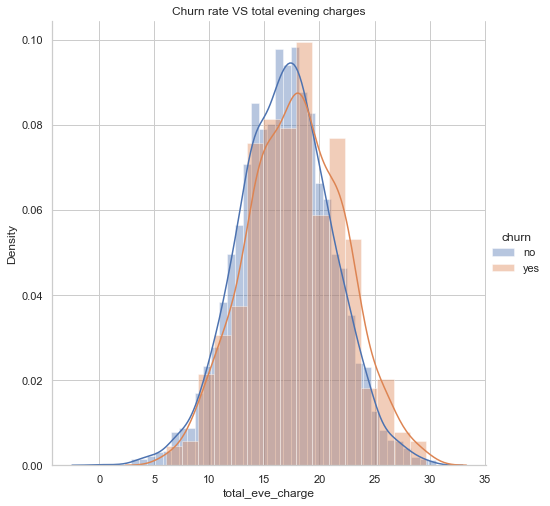

In [33]:
# churn rate is high when the total evening charge is lies between 15 to 18
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_eve_charge').add_legend()
plt.title('Churn rate VS total evening charges')
plt.show()

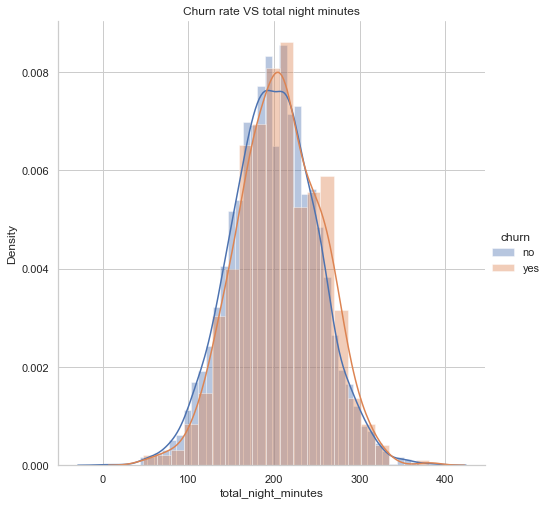

In [34]:
# Churn rate is high when the total_night_minutes is lies between 190 to 220 min
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_night_minutes').add_legend()
plt.title('Churn rate VS total night minutes')
plt.show()

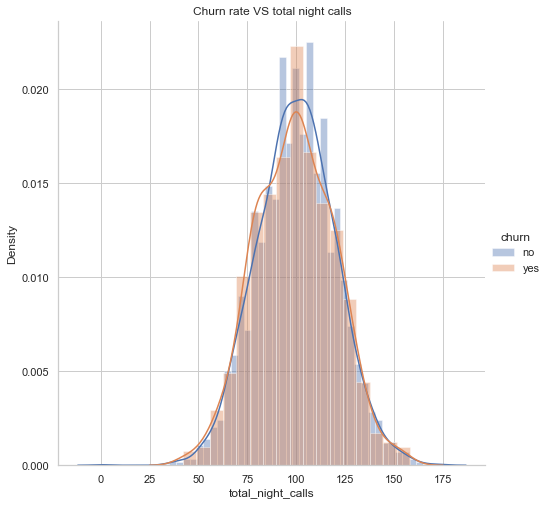

In [35]:
# churn rate is high when total_nigh_calls lies between 90 to 110.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_night_calls').add_legend()
plt.title('Churn rate VS total night calls')
plt.show()

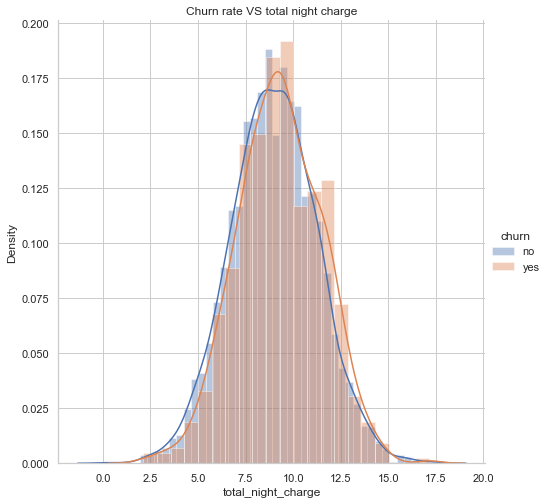

In [36]:
# churn rate is high when total_night_charge lies between 7.5 to 10.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_night_charge').add_legend()
plt.title('Churn rate VS total night charge')
plt.show()

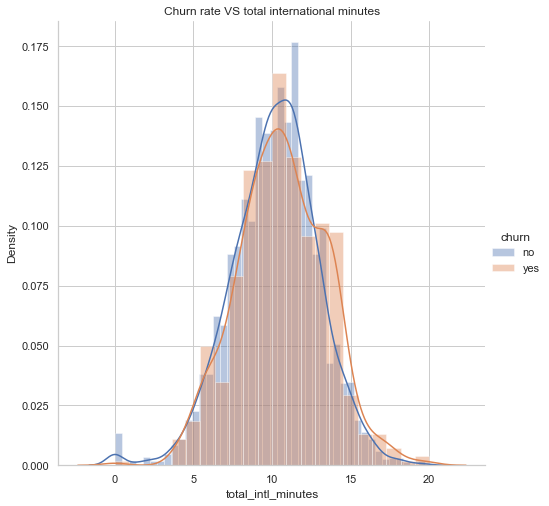

In [37]:
# churn rate is high when total international minutes lies between 9 to 12.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_intl_minutes').add_legend()
plt.title('Churn rate VS total international minutes')
plt.show()

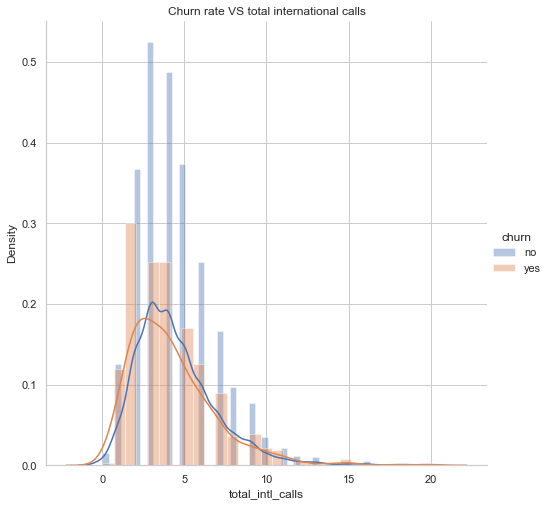

In [38]:
# churn rate is high when total international calls is 1.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_intl_calls').add_legend()
plt.title('Churn rate VS total international calls')
plt.show()

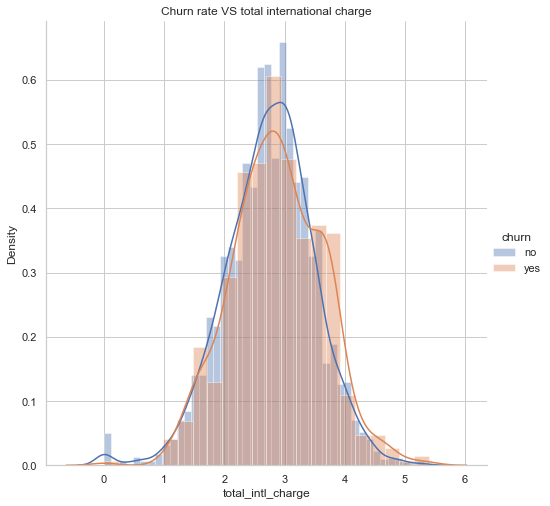

In [39]:
# churn rate is high when total international charge is 2.5 to 3.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'total_intl_charge').add_legend()
plt.title('Churn rate VS total international charge')
plt.show()

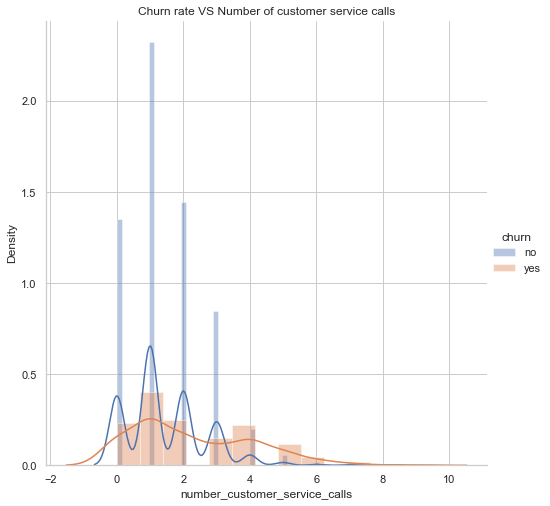

In [40]:
# churn rate is high when number of customer service calls is 1.
sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, 'number_customer_service_calls').add_legend()
plt.title('Churn rate VS Number of customer service calls')
plt.show()

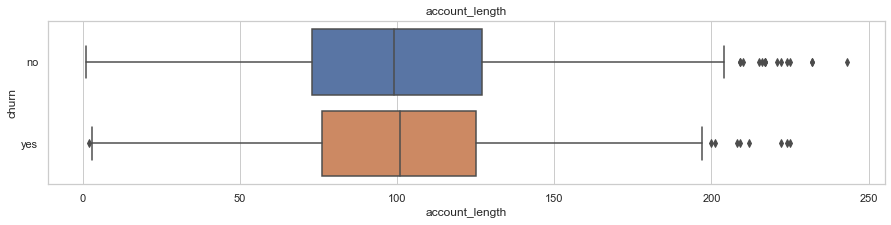

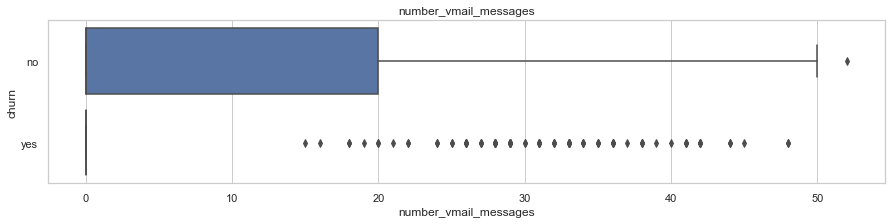

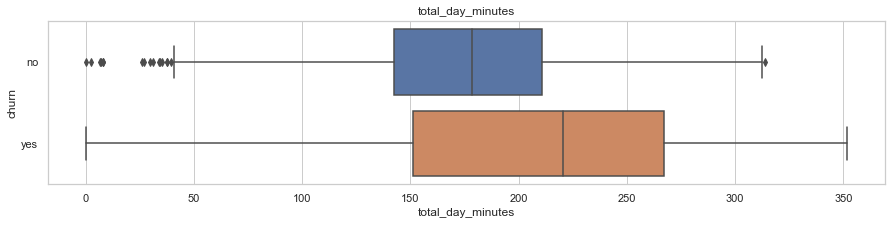

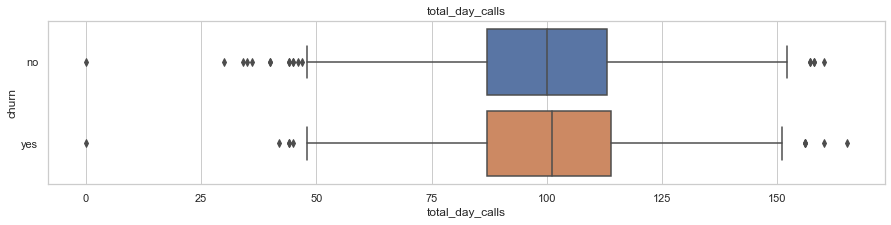

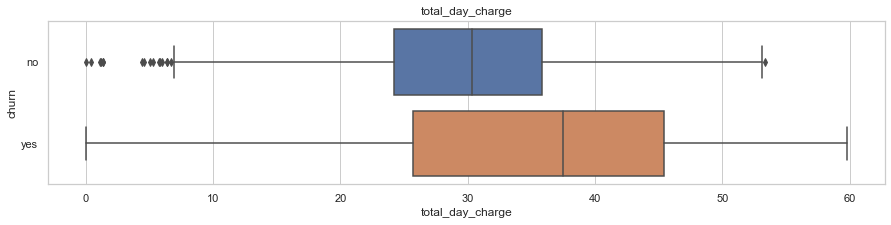

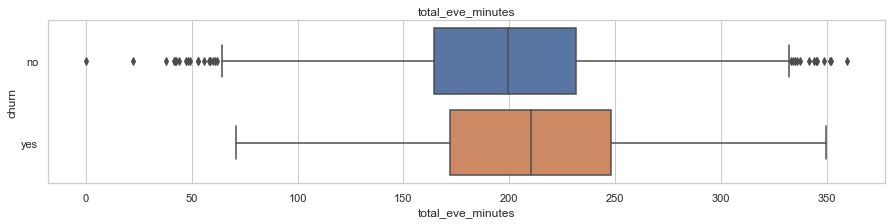

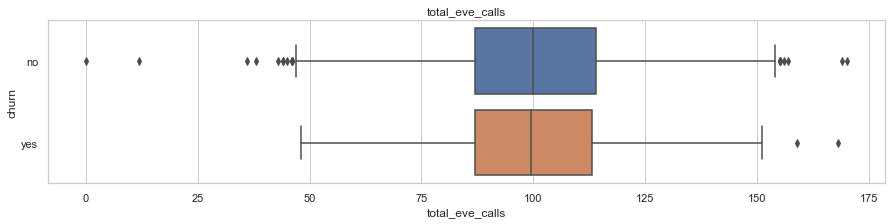

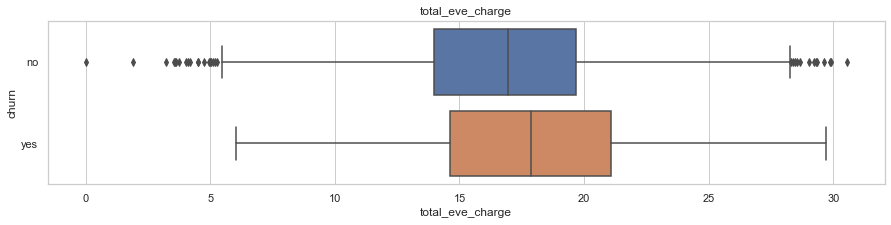

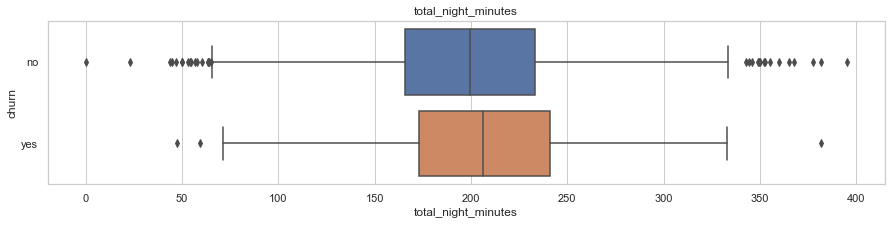

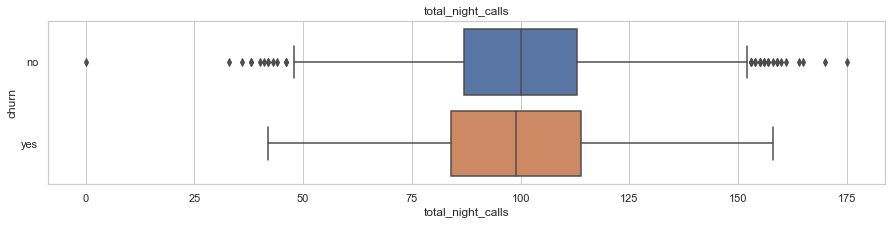

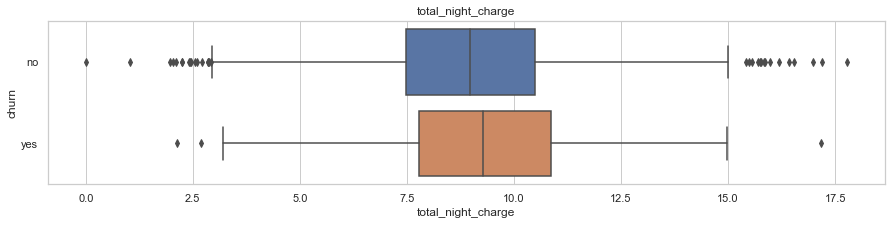

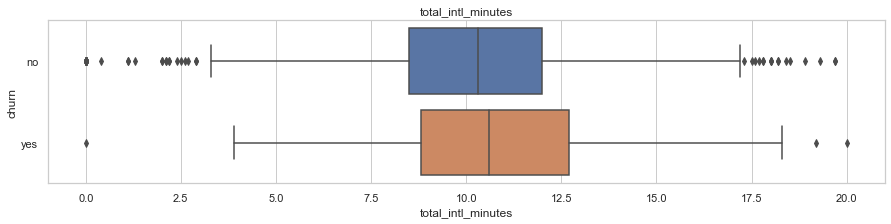

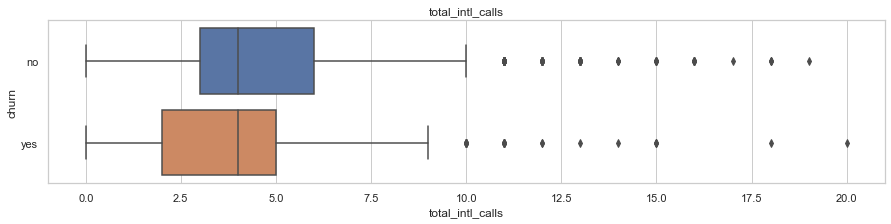

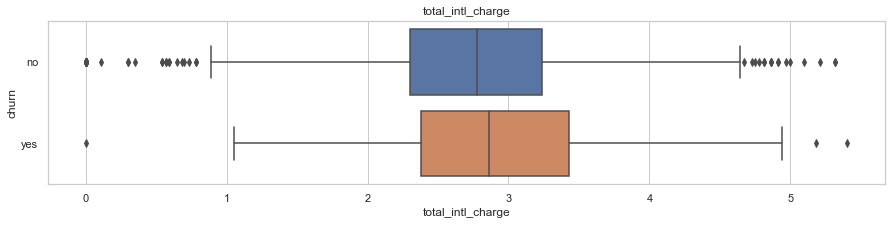

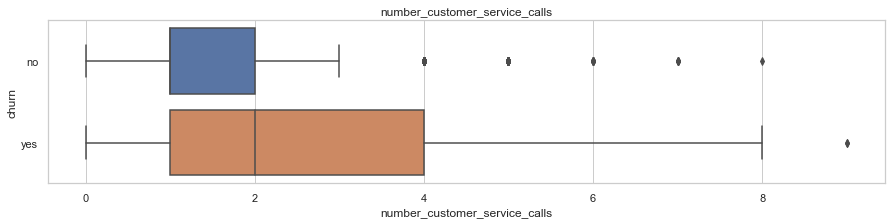

In [45]:
for feature in num_var:
    if feature != 'churn':
        plt.figure(figsize = (15,3))
        sns.boxplot(y ='churn', x = feature, data = data)
        plt.title(feature)
        plt.show()

In [ ]:
# every features has a outliers so we need to remove the outliers.
# outlies contains the some usefull information.
# so we have to replace the outliers with some meaning full values. 
# so we should replace the outliers with meadin values

In [46]:
# Removing the outliers
#functions for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return train

In [47]:
train = remove_outliers(data, num_var)

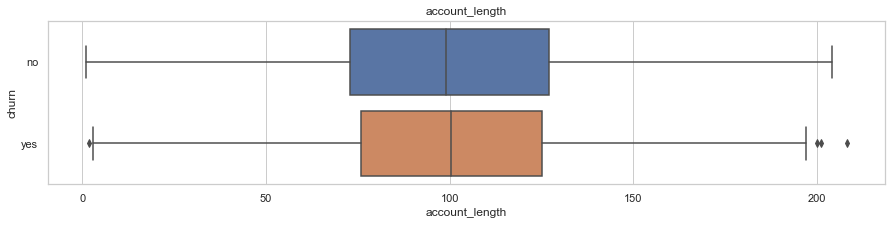

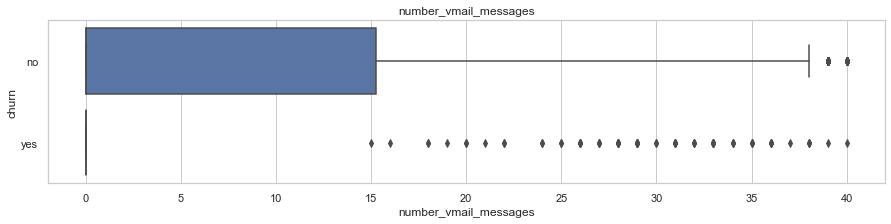

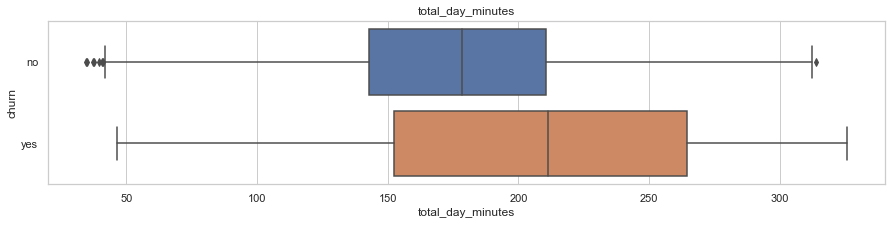

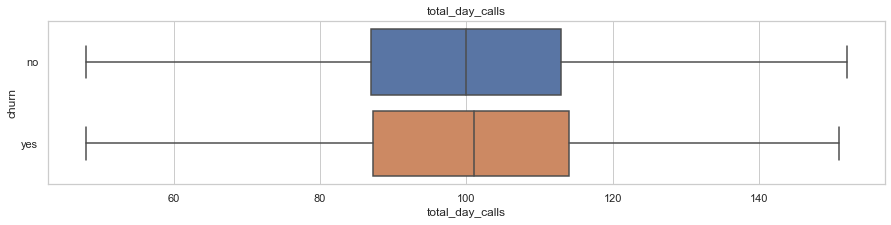

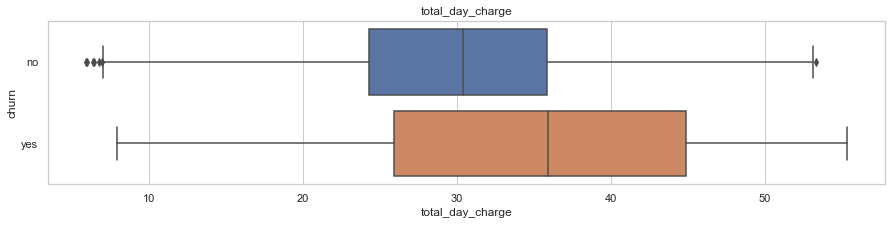

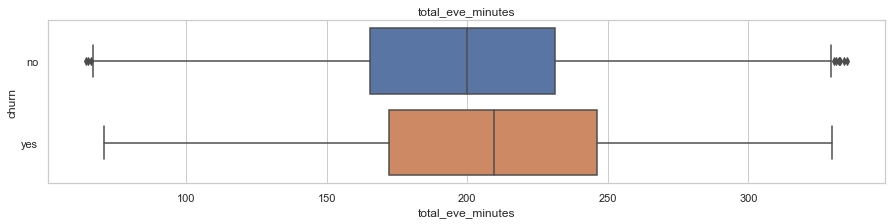

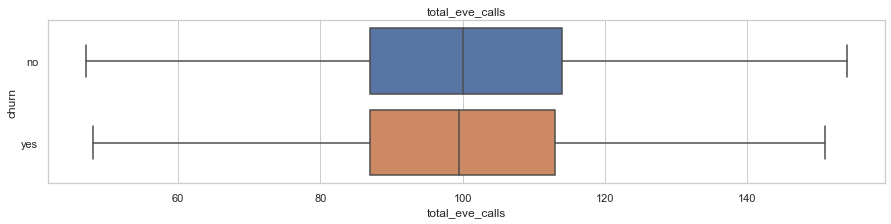

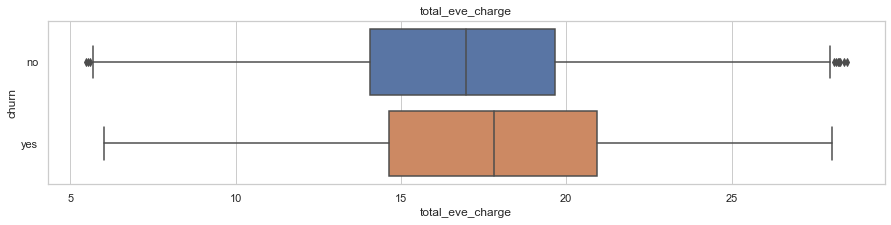

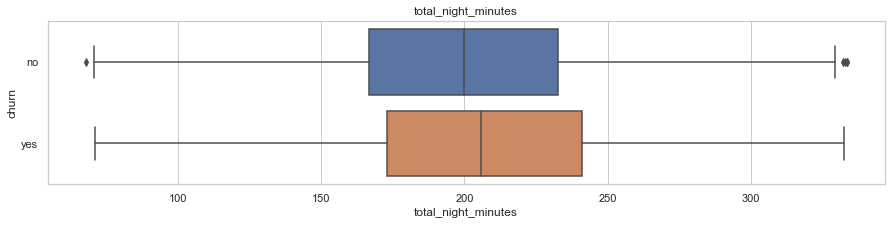

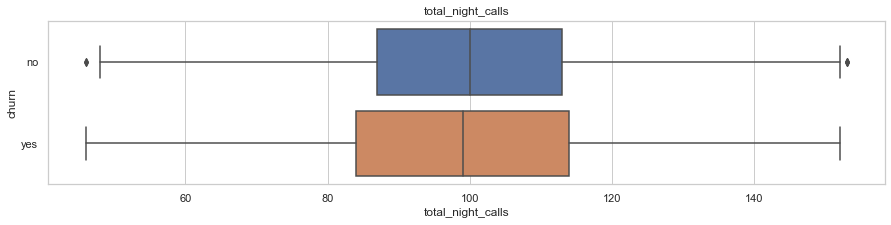

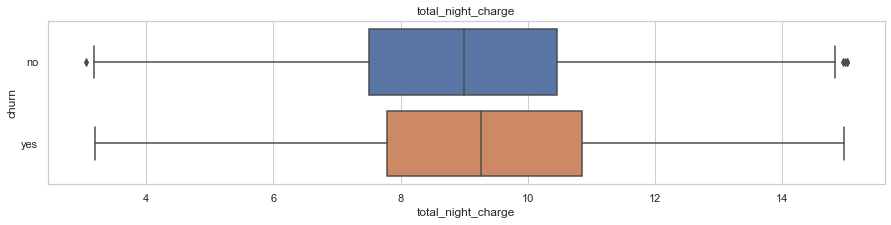

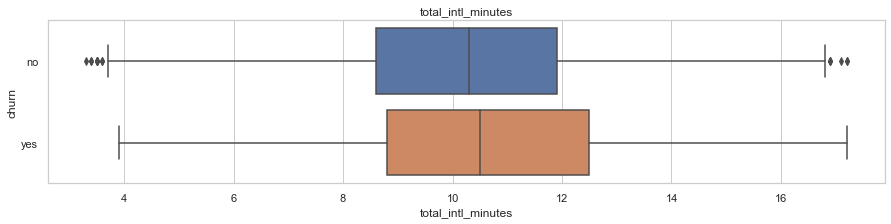

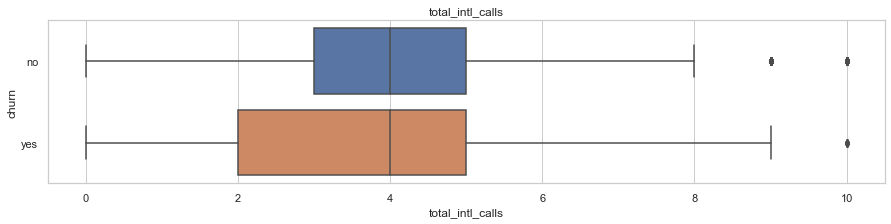

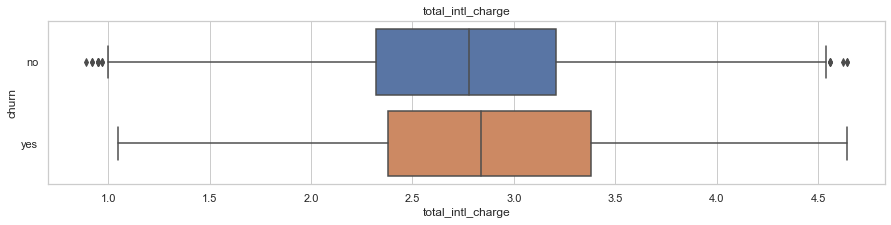

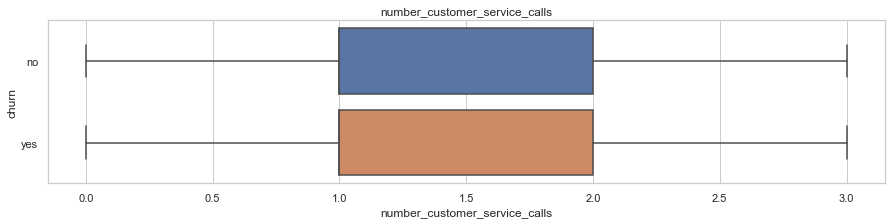

In [48]:
for feature in num_var:
    if feature != 'churn':
        plt.figure(figsize = (15,3))
        sns.boxplot(y ='churn', x = feature, data = train)
        plt.title(feature)
        plt.show()

- Handling the Categorical Variable
state feature has 51 different category so we can't converted into onehot encoder that is it create 51 different features so it leads to overfitting so I will use the hashing encoding for state featuer. *

In [52]:
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(train)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,0,1,0,0,0,0,0,0,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,0,0,0,0,1,0,0,0,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,0,0,0,0,1,0,0,0,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,0,0,0,0,1,0,0,0,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


In [53]:
# replace no to 0 and yes to 1
train.international_plan.replace(['no','yes'],[0,1],inplace = True)
train.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train.churn.replace(['no','yes'],[0,1],inplace = True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107.0,area_code_415,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
1,0,1,0,0,0,0,0,0,137.0,area_code_415,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
2,0,0,0,0,1,0,0,0,84.0,area_code_408,1,0,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
3,0,0,0,0,1,0,0,0,75.0,area_code_415,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0
4,0,0,0,0,1,0,0,0,121.0,area_code_510,0,1,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0


In [54]:
# converting the area_code to numerical variable using one-hot encoder
onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])

encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)

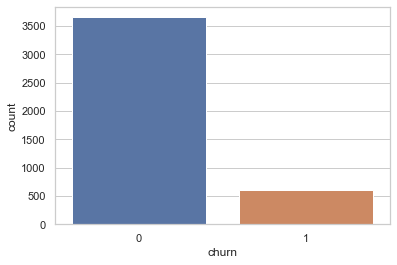

In [55]:
# Handling the Imbalanced dataset
# showing the imbalanced class
sns.countplot(x = 'churn', data = train)
plt.show()

0 represent the no churn and 1 represent the churn so there are huge difference in the class. so we need to balanced the dataset. We have to use upsampling for handling the dataset

In [57]:
x = train.drop('churn',axis=1).values
y = train.churn.values
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [58]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


In [ ]:
# after apply the upsampling technique the number of samples of both classes are same

In [60]:
# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
# Building the model
# Support Vector Classification
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8690196078431373
Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1102
           1       0.69      0.06      0.12       173

    accuracy                           0.87      1275
   macro avg       0.78      0.53      0.52      1275
weighted avg       0.85      0.87      0.82      1275

Confusion Matrix
[[1097    5]
 [ 162   11]]
Cohen kappa score: 
0.09562561852539309


In [62]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9309803921568628
Classification report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1102
           1       0.99      0.50      0.66       173

    accuracy                           0.93      1275
   macro avg       0.96      0.75      0.81      1275
weighted avg       0.94      0.93      0.92      1275

Confusion Matrix
[[1101    1]
 [  87   86]]
Cohen kappa score: 
0.6277347560368682


In [64]:
# XGBClassifier
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01, eval_metric='logloss')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9294117647058824
Classification report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1102
           1       0.98      0.49      0.65       173

    accuracy                           0.93      1275
   macro avg       0.95      0.74      0.81      1275
weighted avg       0.93      0.93      0.92      1275

Confusion Matrix
[[1100    2]
 [  88   85]]
Cohen kappa score: 
0.6192741823104333
